---
# Taxonomic Profiles with Microbiome Analyst

### Questions:
- How can we visualize the taxonomic profiles of our microbiomes with Microbiome Analyst. 

### Objectives:
- Use the Microbiome Analyst to visualize taxonomic data.
- Compare the taxonomic content of samples based on metadata types.

### Keypoints:
- Before visualizing taxa and comparing samples we need to filter abd normalize the taxonomc count data.
- We can explore the taxonomic composition of our data and "tell a story" by visualizing our data on bar charts and grouping by metadata from our samples.

---

## Getting Started

### Go to the Microbiome Analyst website

https://www.microbiomeanalyst.ca/MicrobiomeAnalyst

This tutorial was adapted from:

Chong, Jasmine, et al. "Using MicrobiomeAnalyst for comprehensive statistical, functional, and meta-analysis of microbiome data." Nature protocols 15.3 (2020): 799-821.

## What is the Microbiome Analyst?

MicrobiomeAnalyst is an easy-to-use, web-based platform for comprehensive analysis of common data outputs generated from current microbiome studies. It enables researchers and clinicians with little or no bioinformatics training to explore a wide variety of well-established methods for microbiome data processing, statistical analysis, functional profiling and comparison with public datasets or known microbial signatures. MicrobiomeAnalyst currently contains four modules: Marker-gene Data Profiling (MDP), Shotgun Data Profiling (SDP), Projection with Public Data (PPD), and Taxon Set Enrichment Analysis (TSEA).

This protocol will introduce the MDP module by providing a step-wise description of how to prepare, process and normalize data; perform community profiling; identify important features

#### Overview of the analysis workflow and the interface design

The overall workflow of MicrobiomeAnalyst is depicted in Fig. 1. There are four modules: (i) Marker-gene Data Profiling (MDP), which is dedicated to the analysis of marker-gene survey data; (ii) Shotgun Data Profiling (SDP), for the analysis of shotgun metagenomics or metatranscriptomics data; (iii) Projection to Public Data (PPD), for visual comparison of users’ marker-gene data with a compatible public dataset available in MicrobiomeAnalyst; and (iv) Taxon Set Enrichment Analysis (TSEA), which is used to test whether certain predefined groups of taxa (taxon sets) are statistically overrepresented in a list of taxa submitted by users. The four modules share the same general workflow—data preparation, followed by data analysis and visual exploration (Figure 1).

#### Figure 1: Overview of the MicrobiomeAnalyst. 

MicrobiomeAnalyst comprises four modules: Marker-gene Data Profiling (MDP), Shotgun Data Profiling (SDP), Projection with Public Data (PPD), and Taxon Set Enrichment Analysis (TSEA). The key functions of each module are illustrated in their respective boxes. PC, principal coordinate.

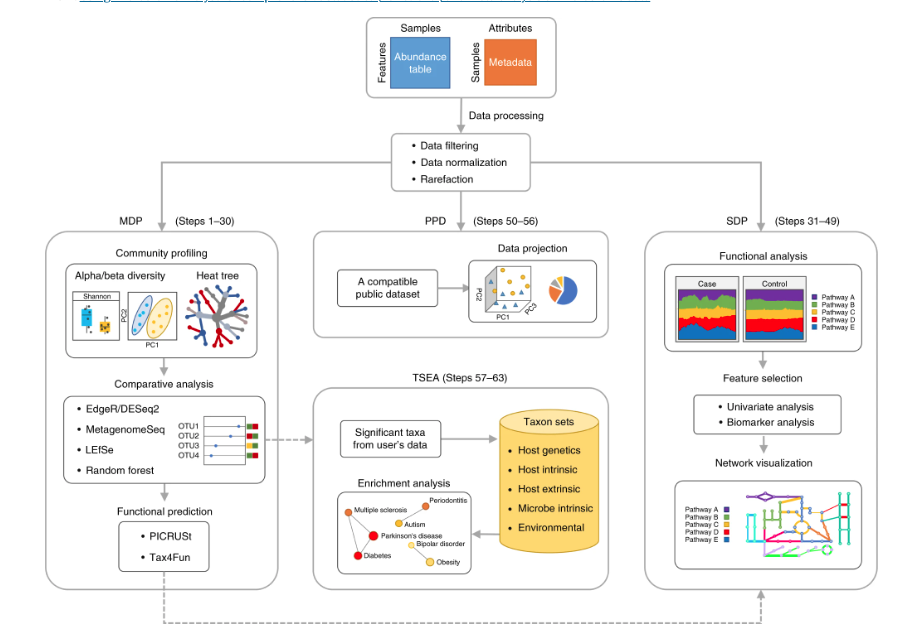

#### Navigating the MicrobiomeAnalyst Platform

MicrobiomeAnalyst uses a dynamic navigation track and real-time system messages to guide users through each step of their data preparation and analysis. As users proceed, the completed steps will be added to the navigation track at the top of the page (Fig. 2 (1)). Users can click on any hyperlink on this track to return to the specified page. Upon completion of their analysis, users can click the ‘Downloads’ link at the end of the navigation track to enter the ‘Results Download’ page (Fig. 2 (2)) and batch-download all results and images generated during the analysis. This page also allows users to generate a comprehensive analysis report describing all the steps performed together with detailed introductions to the corresponding methods and their associated outputs (Fig. 2 (3)). The system messages provide real-time feedback and recommendations if errors occur. On the right-hand side is the ‘R Command History’ panel, which displays the underlying R commands as they occur in real time. Users can install the underlying R package (MicrobiomeAnalystR) from GitHub (https://github.com/xia-lab/MicrobiomeAnalystR) and use these R commands to reproduce their results locally.

Important Note: Users are required to re-upload and re-perform data processing steps each time they open a new session of MicrobiomeAnalyst. There is no way to save your work and go back to it later in the Platform.

#### Figure 2. Screenshot of the MDP ‘Analysis Overview’ page.

A screenshot of the MDP ‘Analysis Overview’ page (1) to illustrate the comprehensive set of analysis methods available. The top left corner shows the navigation track with the current page highlighted in red. The ‘R Command History’ panel to the right of the page displays all underlying R commands. The ‘Downloads of the page’ panel displays the results generated from the current page. Users can also click the ‘Downloads’ link from the top navigation track to enter the ‘Results Download’ page (2) and batch-download all results as well as to generate a comprehensive analysis report (3).

## Data Preparation and Normalization

Microbiome data present several key analytical challenges. First, differences in the number of sequencing reads per sample (i.e., library size) are often very large, requiring proper data normalization before meaningful statistical analysis can be applied. Second, abundance tables at the lowest taxonomic levels are often very sparse. This sparsity may arise from either under-sampling or true absence of taxa. Third, microbiome data is compositional13. If a dominant feature increases, the relative abundance (proportion) of all other features will decrease, even though their absolute abundances remain constant. These inherent characteristics of microbiome data must be considered in downstream statistical analyses. Statistical methods that account for such characteristics are required for a proper analysis of microbiome data. 

In the data preparation stage, the user’s data are uploaded for filtering and normalization. Following this, a wide variety of statistical and visualization methods can be performed on the processed data to detect, for example, overall patterns, significant features, potential interactions, and functional insights. In the case of the MDP module, a total of 19 carefully selected methods are provided (Fig. 2 (1)). The web interface for each method allows users to adjust the key parameters for interactive analysis and visual exploration of the results.

#### Input files

The main input files for MicrobiomeAnalyst are three tab-delimited plain-text files: a feature abundance table containing read counts of features (operational taxonomic units (OTUs)/ASVs/genes) across multiple samples, a taxonomy file for those features (OTUs/ASVs), and a metadata file describing group information for those samples. MicrobiomeAnalyst also accepts BIOM files generated from the QIIME pipeline, as well as outputs from the mothur pipeline.

In our case, we generated a BIOM file from our Kraken2/Bracken results in step 11_data_filter. We are going to use that biom file here.

For the example, this is example.biom comprised of 99 randomly selected infant gut microbiomes for our project.

#### Step 1:

Go to the MicrobiomeAnalyst home page (https://www.microbiomeanalyst.ca) and click the Get Started Button

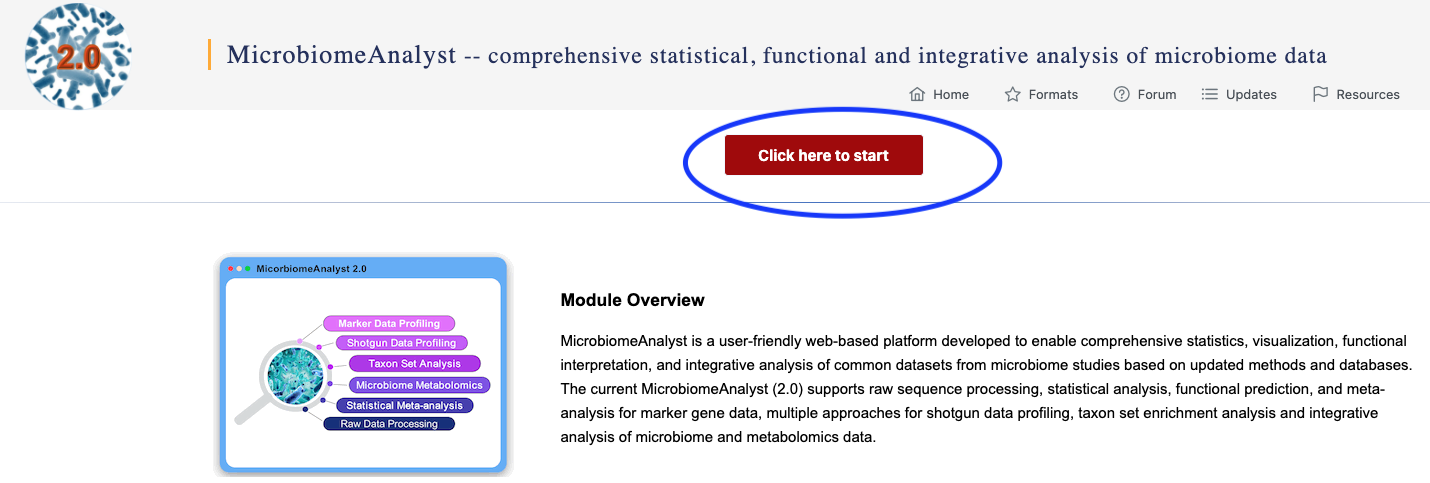

#### Step 2:

Click the ‘Marker Data Profiling (MDP)’ circle to enter the MDP module.

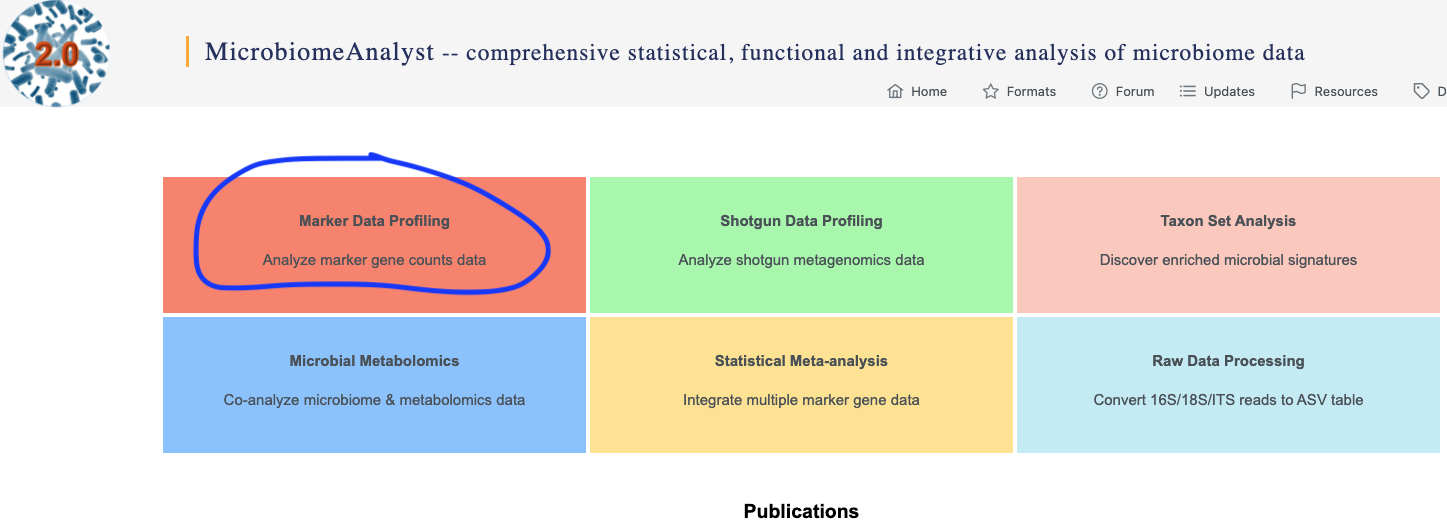

#### Step 3:

Click on the BIOM format tab. Select Metadata included. Choose the example.biom file for this exercise. Select "Not Specific / Other" for the taxonomy label, and click submit.

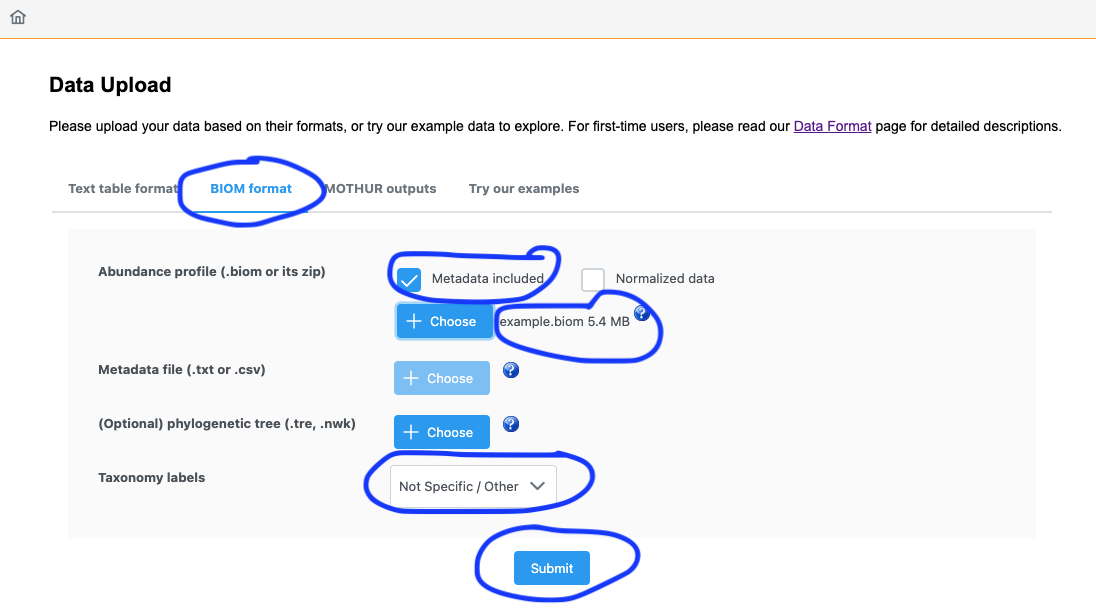


#### Step 4:

Data integrity check. This page consists of two tabs. The first tab, ‘Text Summary’, provides a text summary of the uploaded files. The second tab, ‘Library Size Overview’, graphically describes the read counts for all uploaded samples, which is informative for downstream data filtering and normalization. Scroll down to see the Figure for read counts.

Microbiome Overview:

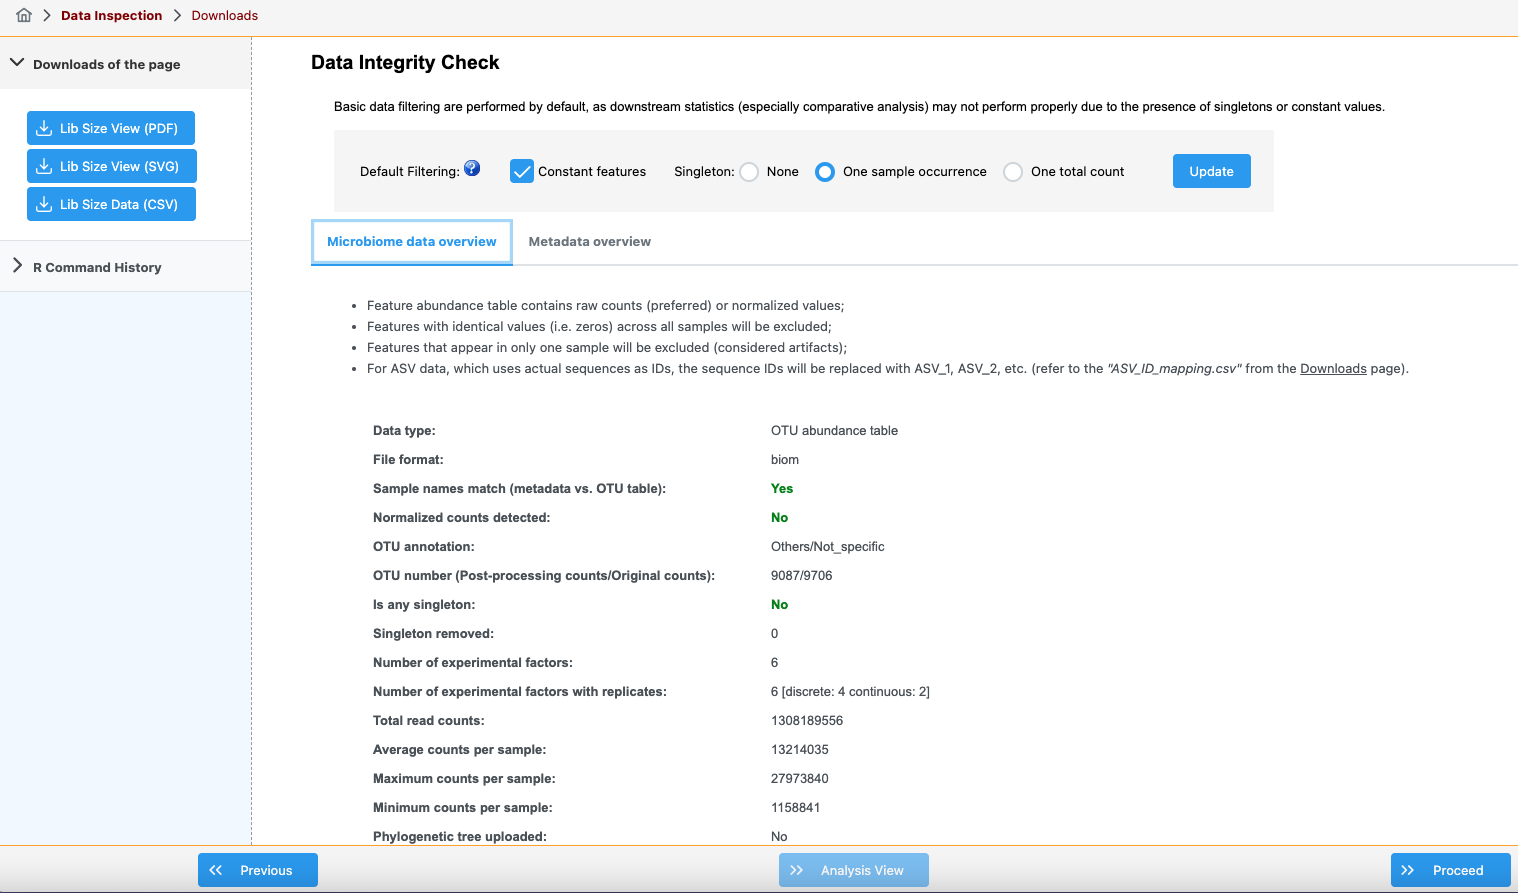


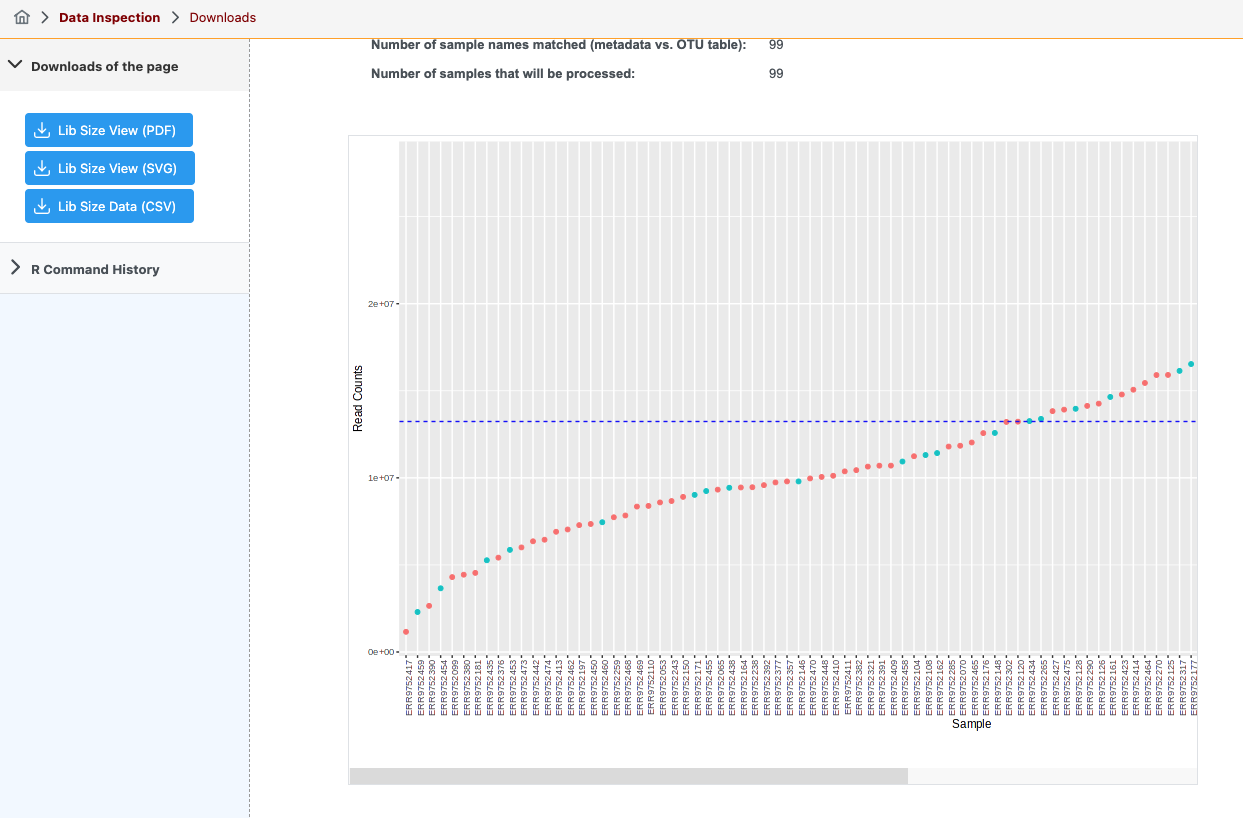


#### Step 5

Edit your metadata to change the order of samples as needed to visualize (by age in weeks for example). Click ‘Proceed’ at the bottom of the page to move forward.

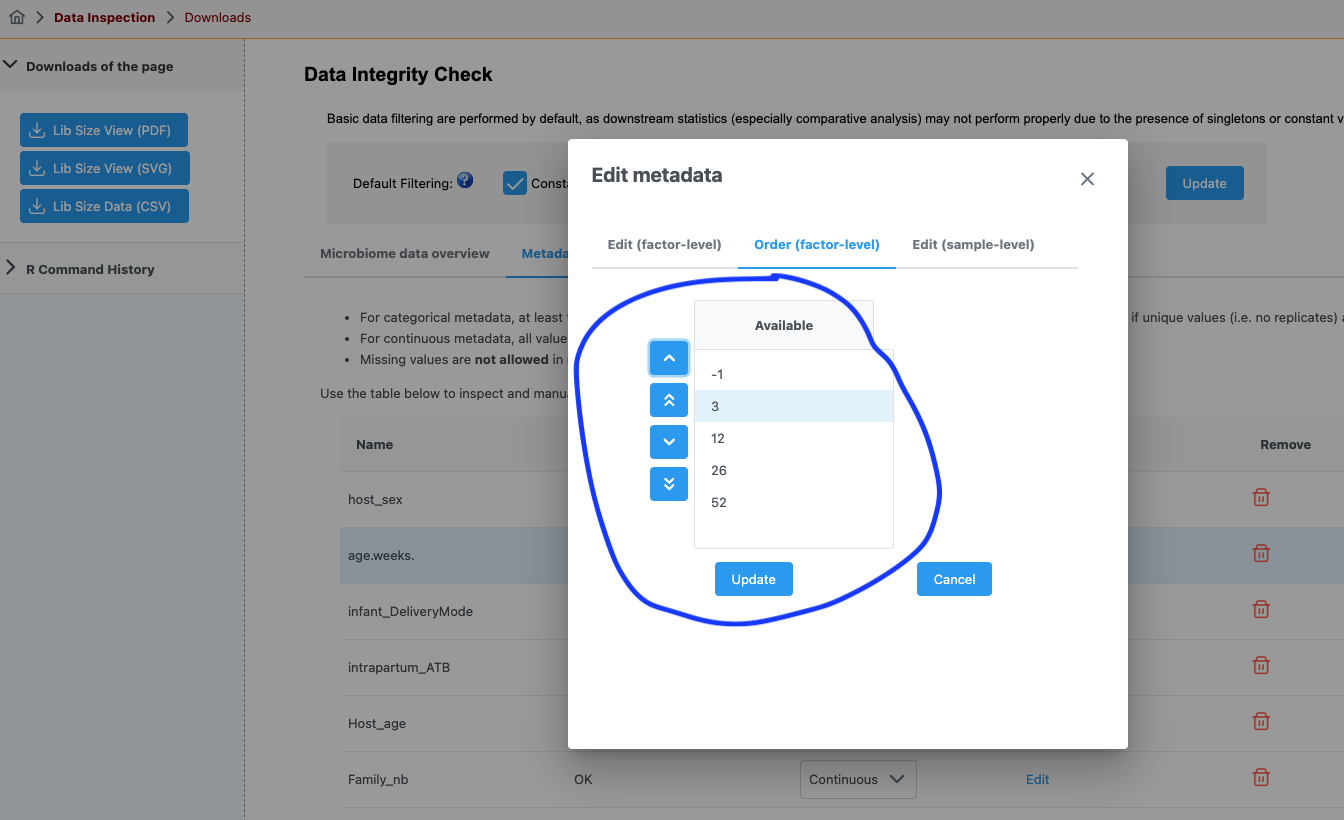

#### Data Filtering and Normalization Overview

In the next few steps, we will explore different approaches available in MicrobiomeAnalyst for data filtering and normalization. Microbiome data are affected by various sources of systematic variation arising from sample preparation to sequencing. Filtering and normalization aim to remove or reduce such systematic variability. The merits and pitfalls of the most commonly used methods are further discussed below. The choice of method is dependent on
the type of analyses to be performed.

##### Data filtering
The purpose of data filtering is to remove low-quality and/or uninformative features to improve downstream statistical analysis. MicrobiomeAnalyst offers three data-filtering procedures (i) minimal data filtering (applied to all analyses), which removes features containing all zeros or appearing in only one sample (considered artifacts); (ii) low-count filtering, which removes features that may exist due to sequencing errors or low-level contamination; and (iii) low-variance filtering, which removes features unlikely to be associated with the
conditions under study. The last two options are not used for within-sample profiling (alpha diversity) but are highly recommended for comparative analysis.

##### Data rarefying
Rarefying is commonly used to account for uneven library sizes. This method works by randomly subsampling without replacement to the size of the smallest library that is not considered defective. It has been criticized because of potential loss of useful information. However, the procedure has been shown to be useful for very small (<1,000 reads/sample) or very uneven library sizes between groups (>10×)53, as well as important for comparing ecological communities (beta diversity).

##### Data scaling
Scaling involves multiplying feature counts by a sample-specific factor to account for uneven sequencing depth, transforming raw reads into relative abundances. The most commonly used method is total sum scaling (TSS), whereby count data are divided by the total number of reads in each sample. This method has been criticized because the total number of reads can be dominated by a few most abundant features, which biases resulting relative abundances. Moreover, TSS does for not account for heteroskedasticity of feature variance across measured values. Other scaling factors, such as upper quantile (UQ)58 and cumulative sum scaling (CSS), have been proposed to address such issues. In particular, when performing differential abundance analysis, CSS has been recommended for controlling the FDR in data with large group sizes. However, when performing community-level comparisons, such as estimation of beta diversity, TSS is recommended because it most accurately captures the composition of the original communities, whereas UQ and CSS distort communities.

##### Data transformation
The aim of data transformation is to stabilize the variance of the data. The centered log ratio (CLR) is commonly used and is recommended because of the compositionality of microbiome data. Furthermore, its variants, relative log expression (RLE) and trimmed mean of M (mean) values (TMM), have consistently demonstrated high performance in identifying differentially abundant features.

Important Note: You can rarefy your data followed by either data scaling or data transformation. However, you cannot apply both data scaling and data transformation, because scaled or transformed data is no longer valid count data.


#### Step 6

Data Filtering

Data Filtering. Filtering is generally recommended to remove low-quality features, thereby improving downstream statistical analysis. Keep the default selections for the ‘Low count filter’ and ‘Low variance filter’ sliders and click ‘Submit’ to perform data filtering. A message will appear in the upper-right corner, indicating the results of the data filtering step. Note that the filtered data will not be used for alpha-diversity analysis (in the next lesson) and users can turn off the filters by dragging the corresponding slider to zero value. Click ‘Proceed’ at the bottom right of the page to navigate to the next page.

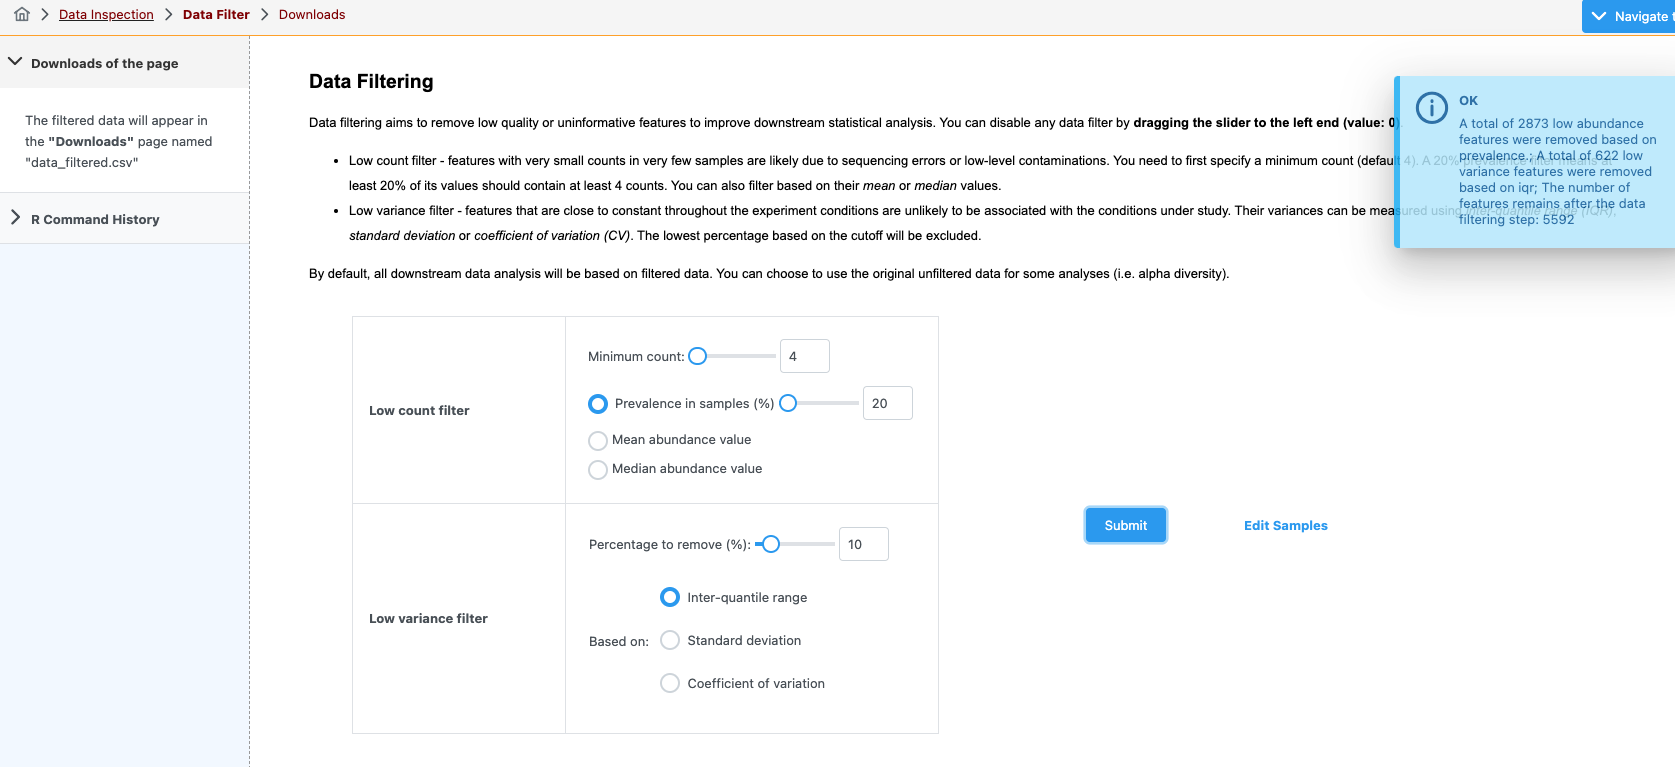


#### Step 7 

Data Normalization

Data normalization. On the ‘Data Normalization’ page, users can perform data rarefying, scaling, and transformation. The aim of data normalization is to standardize the data to enable accurate comparisons. Keep the default selections for the options (only ‘Data transformation’ set to ‘Center log ratio’) and click ‘Submit’, followed by ‘Proceed’ to move to the ‘Analysis Overview’ page.

##### Data rarefying
When the library sizes are very different (i.e. > 10 times), rarefying is recommended (see Weiss, S et al.). Rarefying is mainly used for 16S marker gene data and is disabled for shotgun metagenomics data. We will select "Do not Rarefy"

##### Data Transformation
We cannot apply both data scaling and data transformation, because scaled or transformed data is no longer valid count data. We will use data transformation, Select The centered log ratio (CLR) which is recommended because of the compositionality of microbiome data.

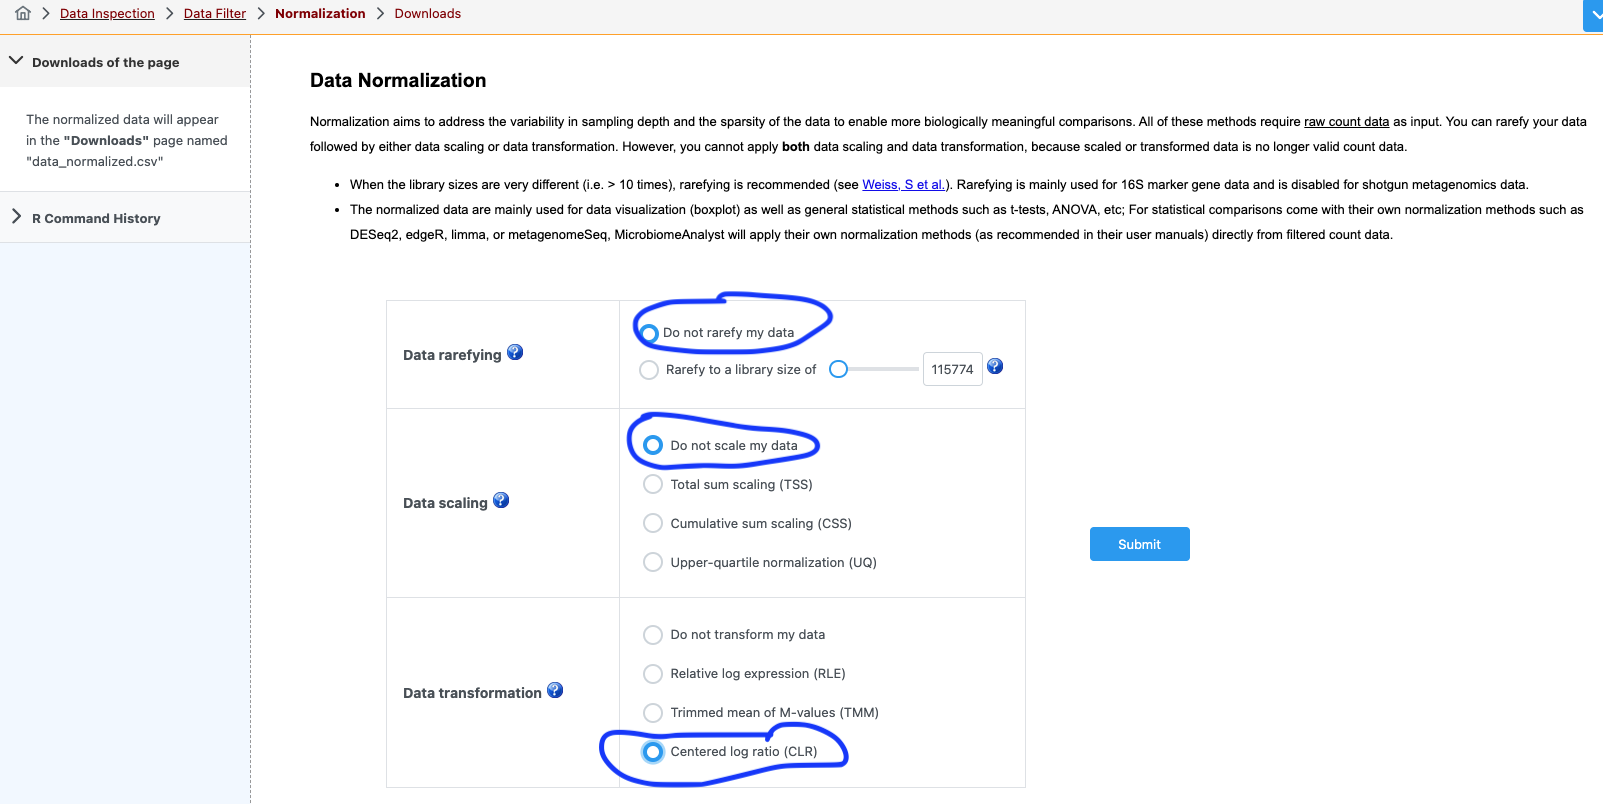


#### Step 8

Visually Explore Your Taxonomic Datasets

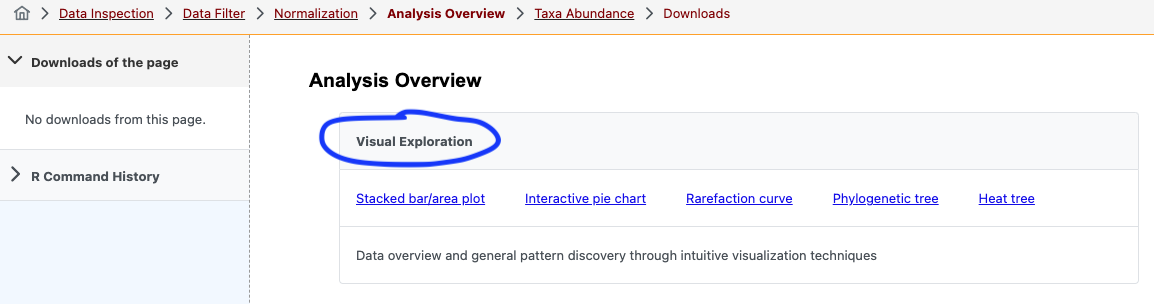

Try out the Stacked bar/area charts plot.

Try grouping samples by metadata.
Try limiting to the top ten taxa (at a given taxonomic level).
Try grouping by multiple metadata features.

Here, I have grouped by weeks, then delivery mode, limited to the top ten families, and created a stacked percent abundance bar chart. In the homework, you can explore what worked best with your data.

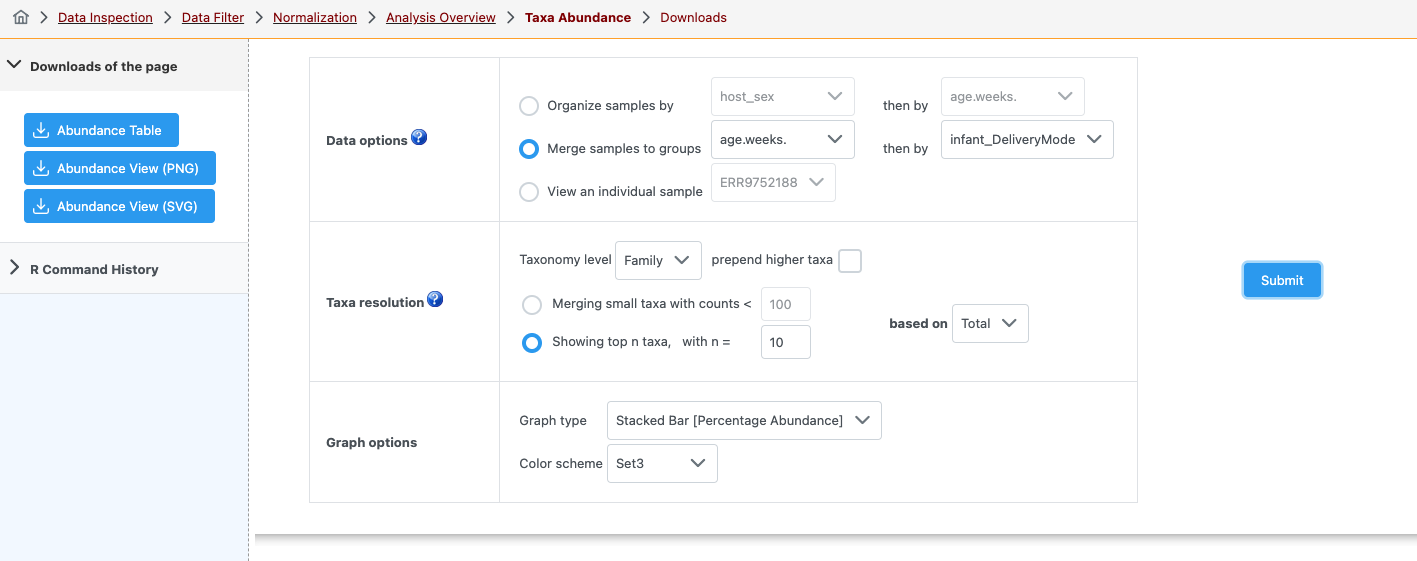

Here is the plot: Can you Figure out how to get the samples in order?

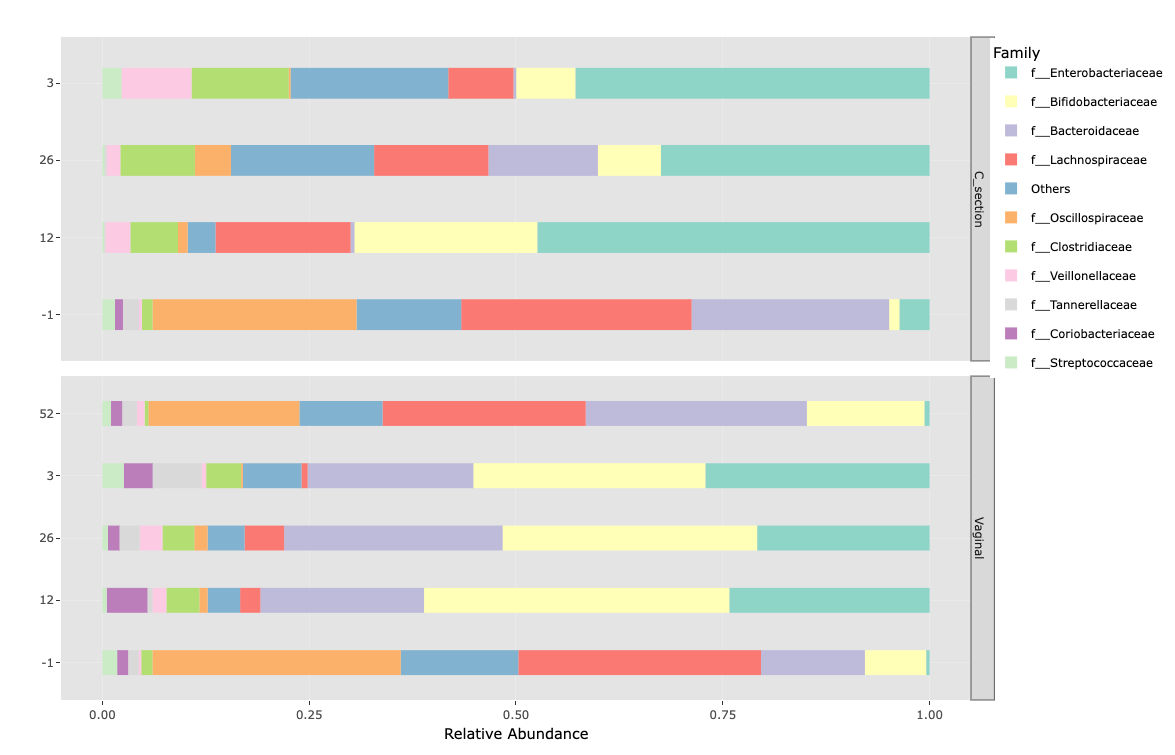

> ## Discussion: Taxonomic Composition by birth mode
>
> We can see in our data that the taxonomic composition of samples varies by birth mode.   
> Which taxa are predominantly in vaginal compared to C section births in your data? How does this compare to what you learned in journal club? Are you seeing the expected result?
> 

## The End

Copy your notebook for future reference...

In [ ]:
# make a variable for the working directory
work_dir = "/xdisk/bhurwitz/bh_class/" + netid + "/exercises/12_taxa_profiles"

In [ ]:
!cp ~/be487-fall-2024/exercises/12_taxa_profiles/ex12_taxa_profiles.ipynb $work_dir